In [1]:
import torch
from torch import optim
from torch import nn

In [2]:
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
# 模型参数
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
# 优化器参数
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2230927314520, 2230927412032, 2230927410304, 2230927411960, 2230927412104, 2230927412176, 2230927412248, 2230927412320, 2230927412392, 2230927412464]}]


## 保存和加载检查点
### 1. 直接保存、恢复模型参数， 一般用于一个完全训练好的模型

In [5]:
!mkdir save

In [7]:
# 保存
save_dst_0 = 'checkpoint.pth'
# model.state_dict() 是网络的参数
torch.save(model.state_dict(), save_dst_0)

In [8]:
# 在加载之前，model一定要是定义过的，并且和保存的模型结构完全一样
model = TheModelClass()
# 首先使用torch.load加载保存的检查点
checkpoint = torch.load(save_dst_0)
# 再用model.load_state_dict恢复网络的参数
model.load_state_dict(checkpoint)

### 2. 保存优化器的参数，这样保存的好处是能使得模型接着之前保存的检查点训练

In [10]:
# 假设的参数
epoch = 1000
loss = 1e-2

# 保存路径
save_dst_1 = 'checkpoint_optim_{}.pth'.format(epoch)

# 保存检查点
torch.save({
            'epoch': epoch, # 迭代次数
            'model_state_dict': model.state_dict(), # 模型参数
            'optimizer_state_dict': optimizer.state_dict(), # 优化器参数
            'loss': loss, # 损失
            # other
            }, 
            save_dst_1)

In [ ]:
# 在加载之前，model一定要是定义过的，并且和保存的模型结构完全一样
model = TheModelClass()
# 如果要恢复优化器参数，则定义的优化器也必须和保存之前的一致
#（TheOptimizerClass(*args, **kwargs)）
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 加载检查点
checkpoint = torch.load(save_dst_1)
# 恢复模型参数 
model.load_state_dict(checkpoint['model_state_dict'])
# 恢复优化器参数
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# 恢复迭代次数
epoch = checkpoint['epoch']
# 恢复记录的loss
loss = checkpoint['loss']

# 接着进行模型训练或者预测

### 3. 交叉GPU CPU 参数 加载和保存

In [ ]:
save_dst_2 = 'checkpoint.pth'

# 1. 保存在 GPU 上,加载到CPU上
# save
torch.save(model.state_dict(), save_dst_2)
# load
device = torch.device('cpu')
model = TheModelClass()
model.load_state_dict(torch.load(save_dst_2, map_location=device))

In [ ]:
# 2. 保存在 GPU 上,加载到GPU上

# save
torch.save(model.state_dict(), save_dst_2)
# laod
device = torch.device("cuda")
model = TheModelClass()
model.load_state_dict(torch.load(save_dst_2, map_location=device))
# 转换到GPU model.cuda()
model.to(device)

In [ ]:
model.cuda()

In [ ]:
model.cpu()

In [ ]:
# 3. 保存在  CPU, 加载到 GPU

# save
torch.save(model.state_dict(), save_dst_2)
# laod
device = torch.device("cuda")
model = TheModelClass()
# map_location指定了要加载到哪个GPU上，cuda:0 代表编号是0的GPU
model.load_state_dict(torch.load(save_dst_2, map_location="cuda:0"))
# 转换到GPU model.cuda()
model.to(device)

#### 保存检查点, 通关提示👇：
训练好网络后，保存模型，以便稍后加载它并进行预测。你可能还需要保存其他内容，例如从类别到索引的映射，索引是从某个图像数据集中获取的：`image_datasets['train'].class_to_idx`。你可以将其作为属性附加到模型上，这样稍后推理会更轻松。

提示：

创建checkpoint字典，字典中最少需要包含模型model相关和题目中要求的`image_datasets['train'].class_to_idx` （这里class_to_idx是ImageFolder中的一个属性）(class_name, class_index)   
使用torch.save保存checkpoint字

In [ ]:
'01' : 30
'02’：20

In [ ]:
checkpoint = {
            'model_state_dict': model.state_dict(), # 模型参数
            'class_to_idx': train_datasets.class_to_idx
            }
torch.save(checkpoint, filepath)

#### 加载检查点, 通关提示👇：
```python
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    pass
```
1. 在load_checkpoint函数中，要求恢复class_to_idx，为了后面方便查询（通过预测出来的名称来得到真正的花朵所在文件夹的名称）

In [ ]:
checkpoint = torch.load(filepath)
model.load_state_dict(checkpoint[''])
class_to_idx = 

## 类别推理
### 图像处理 , 通关提示👇

https://pillow-cn.readthedocs.io/zh_CN/latest/guides.html

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    '''
    输入： 一幅图像的路径
    输出： 一个torch.tensor类型的图像数据
    '''
    # 题目要求
    # 1. 用PIL读取iamge
    # 2. 将图像缩放为 256 * n 或者 n* 256 大小， 
    #    可以使用im.resize， 需要注意的是，缩放后，图像的最小边长是256
    # 3. 从图像的中心裁剪出 224x224 的部分可以使用im.crop，这里的中心部分需要自己算出来
    # 4. 将图像标准化
    #    4.1 先将图像转为numpy矩阵 norm_image，0-255 并缩放到浮点数 0-1的范围
    #    4.2 标准化的均值是means = [0.485, 0.456, 0.406]， 代表三个通道的均值
    #    4.3 标准化的标准差是stds = [0.229, 0.224, 0.225]， 代表三个通道的标准差
    #    4.4 标准化的公式是 norm_image = (np_image - means) / stds
    #    4.5 表转化后使用ndarray.transpose改变通道顺序
    #    4.5 将norm_image使用torch.from_numpy转换为torch.tensor后返回

In [ ]:
image = './a.jpg'

In [ ]:
tensor_image = process_image(image)

In [11]:
import numpy as np

In [13]:
x = np.ones((1, 2, 3))
x.shape

(1, 2, 3)

In [14]:
np.transpose(x, (1, 0, 2)).shape

(2, 1, 3)

In [15]:
np.clip?

### 类别预测, 通关提示👇

英文版需要自己手动完成，中文版notebook有部分代码错误  
更正如下：
```python
# class_to_idx 是 class_name：class_index
# index_to_class 是 class_index：class_name
# class_name 在这个项目中是字符串表示的数字，使用cat_to_name才能拿到真实的名字
index_to_class = {}
for key ,value in class_to_idx.items():
    index_to_class[value] = key
    
# 不需要修改，运行即可
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    model.cuda() # to GPU
    model.eval() # 预测或者评估模式
    img_tensor = process_image(image_path) # 处理图像
    img_tensor.unsqueeze_(0) # 给img_tensor扩充一维度
    img_tensor = img_tensor.type(torch.cuda.FloatTensor) # 转为cuda.FloatTensor类型
    output = model(img_tensor.cuda()) # 预测
    ps = torch.exp(output) # 做了一个exp运算
    probs, index = ps.topk(topk) # 获取到前topk个概率和对应的索引
    probs = probs.cpu().detach().numpy().tolist()[0] # 转为list
    index = index.cpu().detach().numpy().tolist()[0] # 转为list
    index = [index_to_class[i] for i in index] # 从index_to_class取到对应的class
    return probs, index    
```

## 检查运行状况, 通关提示👇

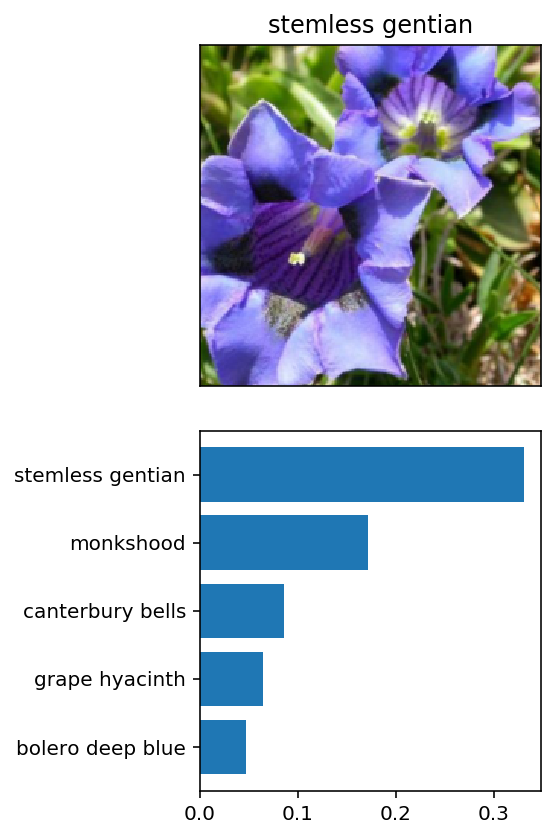

In [ ]:
# TODO: Display an image along with the top 5 classes
# 参数分别为测试花朵的路径，花朵种类的文件夹名称，模型，以及topk
def show_result(path, classname, model, topk):
    '''
    输入：
    path：图像的路径
    classname： 图像的真实类别名称
    model： 训练好的模型
    topk： 取前topk个可能的类别
    
    返回：无
    '''
    '''
    1. 使用上一步实现的predict函数，预测传进来的path图像，得到前topk个概率和对应的类别probs, classes
    2. 使用cat_to_name将classes转换为对应的类别名，classe_names
    3. 根据类别名和概率，画出柱状图
    3. 画出path的原始图片
    '''
    
    pass